**Actividad Semanal -- 7 Regresiones y K means**

---



Diego Alonso Luna Ramirez - A01793035

Profesor(a): María de la Paz Rico

Fecha: 8 Noviembre de 2022


# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

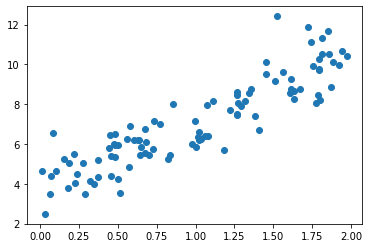

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

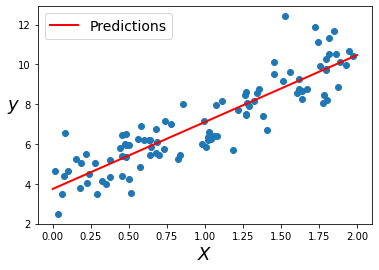

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

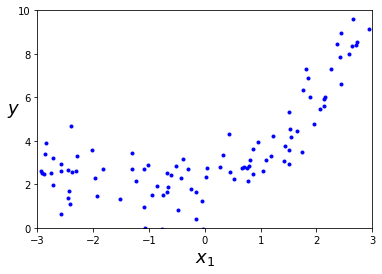

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

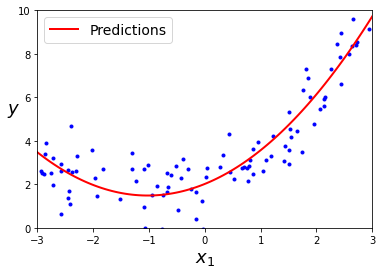

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

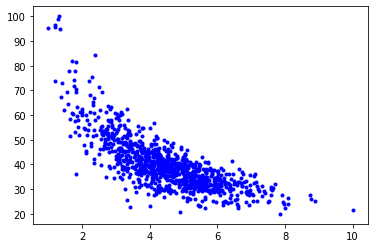

In [27]:
plt.plot(X,y,'b.')

*Division de los Datos*

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'Numero total de datos: {len(X)}')
print(f'Numero de datos de entrenamiento: {len(X_train)}')
print(f'Numero de datos de prueba: {len(X_test)}')

Numero total de datos: 1000
Numero de datos de entrenamiento: 900
Numero de datos de prueba: 100


*Regresión Lineal*

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

LinearRegression()

*Visualización*

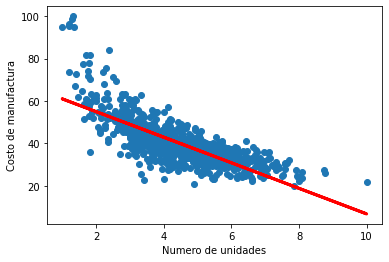

In [30]:
y_hat = reg.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat, color='red', linewidth=3)
plt.xlabel('Numero de unidades')
plt.ylabel('Costo de manufactura')
plt.show()

*Predicción de datos de prueba*

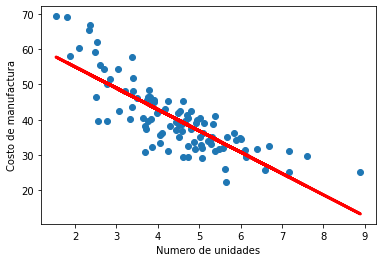

In [31]:
y_hat_test = reg.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat_test, color='red', linewidth=3)
plt.xlabel('Numero de unidades')
plt.ylabel('Costo de manufactura')
plt.show()

*Regresión Lineal - Formula*

In [32]:
print(f'Coeficiente: {reg.coef_}')
print(f'Intercepto: {reg.intercept_}')

Coeficiente: [-6.03357276]
Intercepto: 67.03883293539208


In [33]:
y_hat_test = reg.predict(X_test)
y_hat_test

array([39.77499383, 35.15327271, 35.10496739, 36.68636756, 41.80468776,
       36.40262239, 37.3217255 , 39.98544627, 31.72377374, 48.63730533,
       33.38563989, 51.34460567, 37.13844341, 23.78026639, 27.26901937,
       30.15206108, 44.62931629, 30.7690884 , 34.59891747, 43.66491734,
       39.28308871, 47.66677291, 42.525316  , 39.6856691 , 46.69612455,
       45.98823814, 50.23907154, 21.15751993, 30.06275356, 26.6616138 ,
       43.03222618, 48.600205  , 37.42601354, 40.28286086, 42.55210168,
       46.96111588, 36.26756618, 38.55309689, 30.08417287, 52.77694085,
       43.43759187, 50.37379157, 43.83180383, 23.70312059, 44.25227504,
       44.73155751, 28.49862855, 38.09330997, 41.39635731, 32.73967594,
       38.91722122, 30.93183753, 45.0629296 , 38.69631209, 56.08236308,
       55.73104766, 37.60945039, 57.74171   , 46.46224245, 33.12740555,
       44.33803621, 52.96830309, 39.40668708, 46.71320125, 38.00965204,
       36.20203252, 36.66496517, 31.43136607, 51.56208278, 39.38

*Datos de Prueba*

In [34]:
X_test.iloc[0]

Number of Units    4.518689
Name: 521, dtype: float64

In [35]:
reg.coef_*X_test.iloc[0]+reg.intercept_

Number of Units    39.774994
Name: 521, dtype: float64

In [36]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))
print('R2:', r2_score(y_test, y_hat_test))

listErrors = list()
listErrors.append({"Model": "LinearRegression", 
                      "MAE": metrics.mean_absolute_error(y_test, y_hat_test),
                        "MSE": metrics.mean_squared_error(y_test, y_hat_test),
                        "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)),
                        "R2": r2_score(y_test, y_hat_test)})

MAE: 4.581575620531287
MSE: 33.880444736204986
RMSE: 5.820691087508853
R2: 0.6544705154382865


*Polinomial*

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

*Visualizacion de Regresion Linear*

In [38]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

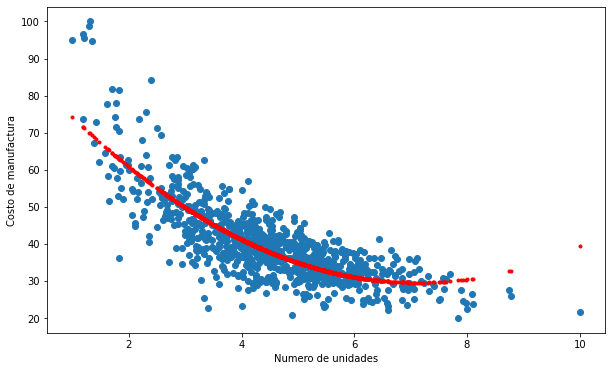

In [39]:
X_train_poly = poly.fit_transform(X_train)
y_hat_poly = lin_reg.predict(X_train_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat_poly, "r.",linewidth=2, label="Predictions")
plt.xlabel('Numero de unidades')
plt.ylabel('Costo de manufactura')
plt.show()

*Predicción de los datos de prueba*

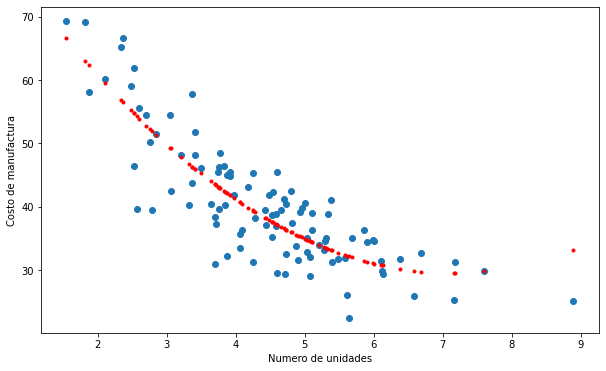

In [40]:
X_test_poly = poly.fit_transform(X_test)
y_hat_test_poly = lin_reg.predict(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat_test_poly, "r.",linewidth=2, label="Predictions")
plt.xlabel('Numero de unidades')
plt.ylabel('Costo de manufactura')
plt.show()

*Formula de la regresion polinomial*

In [41]:
print(f'Coeficiente: {lin_reg.coef_}')
print(f'Intercepto: {lin_reg.intercept_}')

Coeficiente: [-16.95147175   1.18852154]
Intercepto: 89.97388061400437


In [42]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test_poly))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_poly)))
print('R2:', r2_score(y_test, y_hat_test_poly))

listErrors.append({"Model": "PolynomialRegression",
                        "MAE": metrics.mean_absolute_error(y_test, y_hat_test_poly),
                        "MSE": metrics.mean_squared_error(y_test, y_hat_test_poly),
                        "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_poly)),
                        "R2": r2_score(y_test, y_hat_test_poly)})

MAE: 4.070921827959767
MSE: 26.029748602766393
RMSE: 5.101935770152972
R2: 0.7345357864097419


*RIDGE*

In [43]:
from sklearn.linear_model import Ridge
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'positive': [True, False], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
    cv=5,   
    n_jobs=-1
)

result = grid.fit(X_train_poly, y_train)

print(f'Best score: {result.best_score_}')
print(f'Best parameters: {result.best_params_}')

Best score: 0.6402242389699893
Best parameters: {'alpha': 1, 'positive': False, 'solver': 'lsqr'}


In [44]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.001, normalize=True)
ridgeReg.fit(X_train, y_train)

Ridge(alpha=0.001, normalize=True)

*Ridge Visualizacion*

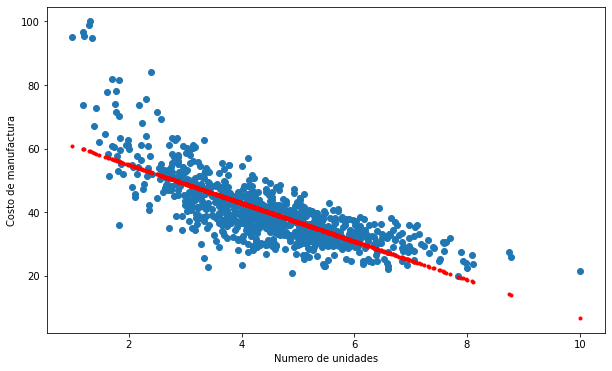

In [45]:
y_hat_ridge = ridgeReg.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat_ridge, "r.",linewidth=2, label="Predictions")
plt.xlabel('Numero de unidades')
plt.ylabel('Costo de manufactura')
plt.show()

*Predicciones de Prueba*

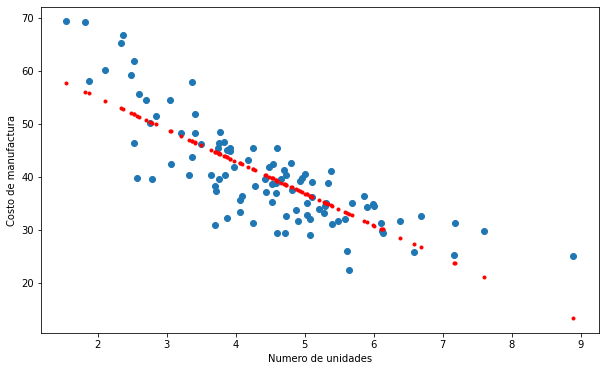

In [46]:
y_hat_test_ridge = ridgeReg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat_test_ridge, "r.",linewidth=2, label="Predictions")
plt.xlabel('Numero de unidades')
plt.ylabel('Costo de manufactura')
plt.show()

*Formula regresion Ridge*

In [47]:
print(f'Coeficiente: {ridgeReg.coef_}')
print(f'Intercepto: {ridgeReg.intercept_}')

Coeficiente: [-6.02754522]
Intercepto: 67.01184466012113


In [48]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test_ridge))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_ridge)))
print('R2:', r2_score(y_test, y_hat_test_ridge))

listErrors.append({"Model": "RidgeRegression",
                        "MAE": metrics.mean_absolute_error(y_test, y_hat_test_ridge),
                        "MSE": metrics.mean_squared_error(y_test, y_hat_test_ridge),
                        "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_ridge)),
                        "R2": r2_score(y_test, y_hat_test_ridge)})

MAE: 4.581834172401718
MSE: 33.88046558074607
RMSE: 5.8206928780640945
R2: 0.6544703028553764


*LASSO*

In [49]:
from sklearn.linear_model import Lasso
grid = GridSearchCV( 
    estimator=Lasso(random_state=42),
    param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    cv=5,

    n_jobs=-1
)
res=grid.fit(X_train, y_train)

print(f'Best alpha: {grid.best_params_}')
print(f'Best score: {res.best_score_}')

Best alpha: {'alpha': 0.1}
Best score: 0.5564351515051256


In [50]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train, y_train)

Lasso(alpha=0.001)

*Lasso visualizacion*

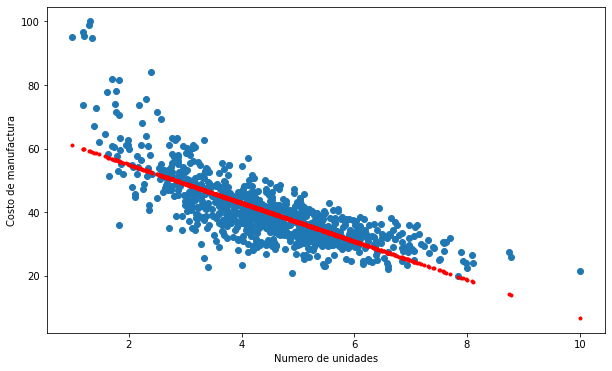

In [51]:
y_hat_lasso = lassoReg.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat_lasso, "r.",linewidth=2, label="Predictions")
plt.xlabel('Numero de unidades')
plt.ylabel('Costo de manufactura')
plt.show()

*Predicción de prueba*

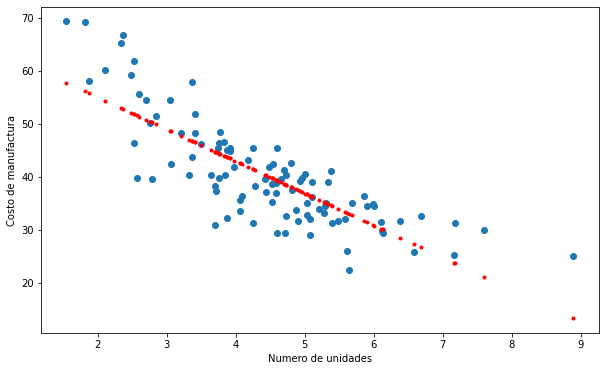

In [52]:
y_hat_test_lasso = lassoReg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat_test_lasso, "r.",linewidth=2, label="Predictions")
plt.xlabel('Numero de unidades')
plt.ylabel('Costo de manufactura')
plt.show()

*Formula Regresion Lasso*

In [53]:
print(f'Coeficiente: {lassoReg.coef_}')
print(f'Intercepto: {lassoReg.intercept_}')

Coeficiente: [-6.03301276]
Intercepto: 67.03632553522826


In [54]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test_lasso))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_lasso)))
print('R2:', r2_score(y_test, y_hat_test_lasso))

listErrors.append({"Model": "LassoRegression",
                        "MAE": metrics.mean_absolute_error(y_test, y_hat_test_lasso),
                        "MSE": metrics.mean_squared_error(y_test, y_hat_test_lasso),
                        "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_lasso)),
                        "R2": r2_score(y_test, y_hat_test_lasso)})

MAE: 4.581599641814446
MSE: 33.880441264455946
RMSE: 5.82069078928403
R2: 0.6544705508448954


*GRAFICAS*

**MAE**

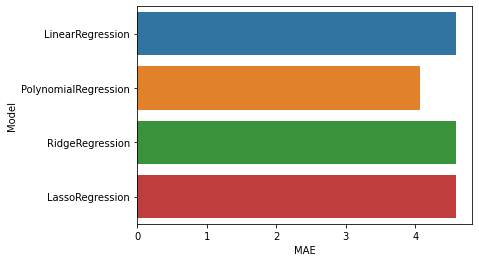

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

df_errors = pd.DataFrame(listErrors)
sns.barplot(x="MAE", y="Model", data=df_errors)
plt.show()

**R2**

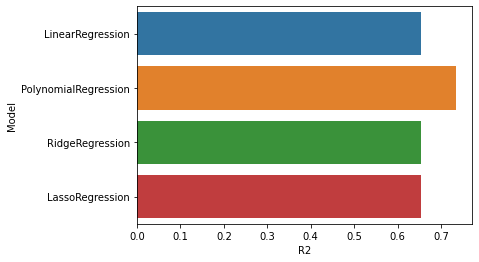

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

df_errors = pd.DataFrame(listErrors)
sns.barplot(x="R2", y="Model", data=df_errors)
plt.show()

**RESULTADOS/CONCLUSION**

La de Regresion Lineal es la que tiene mejor aproximación, ya que tiene un R2 mayor y un margen de error menor, ajustandose de esa manera mejor a los datos. El porcentaje de entrenamiento y evaluación usado fue de 20%/80%; el error que se obtuvo fue del 0.001, un error practicamente bajo, lo que da como conclusion, un modelo correcto.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [59]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [60]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


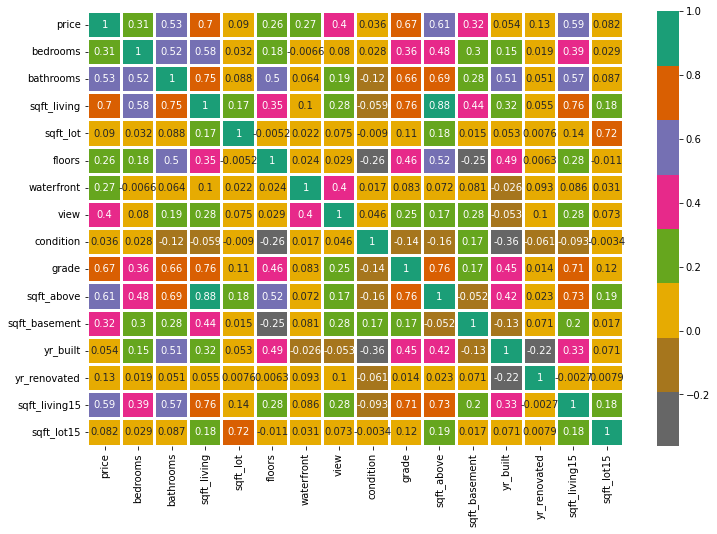

In [61]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [62]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

*Dividir datos de entrenamiento y prueba*

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Regresion multilineal*

In [64]:
from sklearn.linear_model import LinearRegression

multiReg = LinearRegression(fit_intercept=True)
multiReg.fit(X_train, y_train)

LinearRegression()

*Formula de la regresion*

In [65]:
print(f'Coeficiente: {multiReg.coef_}')
print(f'Intercepto: {multiReg.intercept_}')

Coeficiente: [[-3.86207534e+04  4.89708583e+04  1.08193320e+02 -4.52535774e-02
   2.81204344e+04  5.55592909e+05  4.37789469e+04  1.71669643e+04
   1.18063572e+05  5.07156966e+01  5.74776228e+01 -3.62179096e+03
   1.09041872e+01  2.54813410e+01 -4.61010059e-01]]
Intercepto: [6308390.79450575]


*R2*

In [66]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_hat_train_multi = multiReg.predict(X_train)
y_hat_test_multi = multiReg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test_multi))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test_multi))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_multi)))
print('R2:', r2_score(y_test, y_hat_test_multi))

listErrors = []
listErrors.append({"Model": "MultiRegression",
                        "MAE": metrics.mean_absolute_error(y_test, y_hat_test_multi),
                        "MSE": metrics.mean_squared_error(y_test, y_hat_test_multi),
                        "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_multi)),
                        "R2": r2_score(y_test, y_hat_test_multi)})

MAE: 143187.80429161084
MSE: 52291717658.996605
RMSE: 228673.82372933856
R2: 0.6541020314679789


*Regresion multiple polinomial*

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)



In [68]:
multiRegPoly = LinearRegression()
multiRegPoly.fit(X_train_poly, y_train)

LinearRegression()

*Formula*

In [69]:
print(f'Coeficiente: {multiRegPoly.coef_}')
print(f'Intercepto: {multiRegPoly.intercept_}')

Coeficiente: [[ 9.23916461e+05 -9.97198206e+05 -2.61069083e+02 -3.87791510e+01
  -2.15400720e+06 -5.27152928e+06 -4.00367313e+04  3.50076264e+05
   1.11661860e+06 -2.74790772e+02 -1.01126256e+02 -8.91800226e+04
  -3.21527141e+03  3.90471576e+03 -1.17957304e+01  7.58154101e+02
   2.83994662e+03 -1.03073229e+01  2.67425906e-01  1.30615716e+04
   1.17597805e+04 -4.96123851e+03 -2.17055163e+03 -8.56401316e+02
  -4.47897164e+00 -1.20792913e+01 -4.82868530e+02 -1.23856530e+01
   1.70334478e+01 -2.52655755e-02 -5.17529724e+03  2.94849924e+01
  -5.73680488e-01 -2.96787858e+04 -1.44535318e+04  1.55814979e+04
  -5.97525781e+03  1.60176342e+04  2.35118048e+01  5.56178323e+00
   4.82188479e+02 -2.34214715e+01 -3.58171571e+01  4.36263716e-01
   1.36238998e+01  4.81776486e+00 -8.34579113e+00  1.48421896e+02
  -5.43737222e+00  5.90353236e+00  2.11699318e+01 -1.83281115e+01
  -7.68451451e+00 -1.49321624e+00  8.41074522e-02 -1.08106274e+00
  -3.14893180e+01  1.11712143e-06 -1.61594876e-01 -5.05737133e-

*R2*

In [70]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_hat_train_multiPoly = multiRegPoly.predict(X_train_poly)
y_hat_test_multiPoly = multiRegPoly.predict(poly.fit_transform(X_test))

print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test_multiPoly))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test_multiPoly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_multiPoly)))
print('R2:', r2_score(y_test, y_hat_test_multiPoly))

listErrors.append({"Model": "MultiRegressionPoly",
                        "MAE": metrics.mean_absolute_error(y_test, y_hat_test_multiPoly),
                        "MSE": metrics.mean_squared_error(y_test, y_hat_test_multiPoly),
                        "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_multiPoly)),
                        "R2": r2_score(y_test, y_hat_test_multiPoly)})

MAE: 130089.44197678474
MSE: 45510103820.97833
RMSE: 213330.97248402148
R2: 0.69896088397759


*Regresion Ridge*

In [71]:
from sklearn.linear_model import Ridge
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid={
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'positive': [True, False]
    },
    cv=5,
    n_jobs=-1
)

result = grid.fit(X_train, y_train)

print(f'Best score: {result.best_score_}')
print(f'Best params: {result.best_params_}')

Best score: 0.6519030571701591
Best params: {'alpha': 1, 'positive': False, 'solver': 'svd'}


In [72]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=10, solver='sag', positive=False)
ridgeReg.fit(X_train, y_train)

Ridge(alpha=10, solver='sag')

*Formula*

In [73]:
print(f'Coeficiente: {ridgeReg.coef_}')
print(f'Intercepto: {ridgeReg.intercept_}')

Coeficiente: [[ 1.34498583e-02  8.93940199e-02  1.44750045e+02  3.63548402e-02
   2.48883991e-02  1.50220183e-02  1.64359838e-01  4.67729300e-02
   2.53185677e-01  8.74983382e+01  5.72517067e+01 -3.40928238e+00
   3.07548077e+01  8.10193800e+01 -6.92988205e-01]]
Intercepto: [-83390.18852669]


*R2*

In [74]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_hat_train_ridge = ridgeReg.predict(X_train)
y_hat_test_ridge = ridgeReg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test_ridge))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_ridge)))
print('R2:', r2_score(y_test, y_hat_test_ridge))

listErrors.append({"Model": "Ridge",
                        "MAE": metrics.mean_absolute_error(y_test, y_hat_test_ridge),
                        "MSE": metrics.mean_squared_error(y_test, y_hat_test_ridge),
                        "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_ridge)),
                        "R2": r2_score(y_test, y_hat_test_ridge)})

MAE: 174323.46199379335
MSE: 74562229411.28453
RMSE: 273060.85294542776
R2: 0.5067875977842429


*Regresion Lasso*

In [75]:
from sklearn.linear_model import Lasso
grid = GridSearchCV(
    estimator=Lasso(random_state=42),
    param_grid={
      'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    },
    cv=5, 
    n_jobs=-1,
)


result = grid.fit(X_train, y_train)

print(f'Best score: {result.best_score_}')
print(f'Best params: {result.best_params_}')

Best score: 0.6519016217441242
Best params: {'alpha': 10}


*Formula*

In [76]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [77]:
print(f'Coeficiente: {lassoReg.coef_}')
print(f'Intercepto: {lassoReg.intercept_}')

Coeficiente: [-3.86207521e+04  4.89708545e+04  2.92631403e+02 -4.52535823e-02
  2.81204298e+04  5.55592750e+05  4.37789526e+04  1.71669615e+04
  1.18063571e+05 -1.33722382e+02 -1.26960459e+02 -3.62179091e+03
  1.09041897e+01  2.54813401e+01 -4.61010061e-01]
Intercepto: [6308390.72184118]


*R2*

In [78]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_hat_train_lasso = lassoReg.predict(X_train)
y_hat_test_lasso = lassoReg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test_lasso))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_lasso)))
print('R2:', r2_score(y_test, y_hat_test_lasso))

listErrors.append({"Model": "Lasso",
                        "MAE": metrics.mean_absolute_error(y_test, y_hat_test_lasso),
                        "MSE": metrics.mean_squared_error(y_test, y_hat_test_lasso),
                        "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_lasso)),
                        "R2": r2_score(y_test, y_hat_test_lasso)})

MAE: 143187.804592535
MSE: 52291717903.924706
RMSE: 228673.82426487887
R2: 0.6541020298478344


*GRAFICAS*

*MAE*

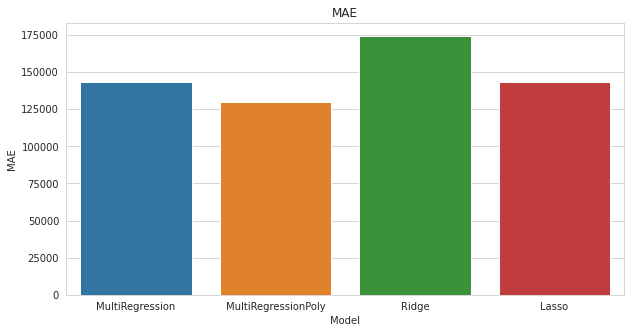

In [79]:

import matplotlib.pyplot as plt
import seaborn as sns

dfErrors = pd.DataFrame(listErrors)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.title("MAE")
sns.barplot(x="Model", y="MAE", data=dfErrors)

*R2*

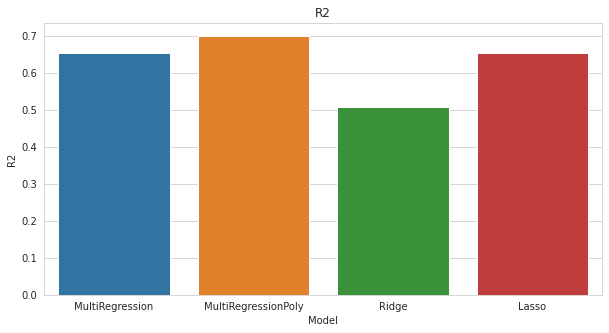

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

dfErrors = pd.DataFrame(listErrors)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.title("R2")
sns.barplot(x="Model", y="R2", data=dfErrors)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Cantidad total de registros en la bdd: {len(X)}')
print("---------------"*10)
print(f'Cantidad total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("---------------"*10)
print(f'Cantidad total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Cantidad total de registros en la bdd: 21613
------------------------------------------------------------------------------------------------------------------------------------------------------
Cantidad total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
------------------------------------------------------------------------------------------------------------------------------------------------------
Cantidad total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


**Resultado/Conclusiones**

En base a lo desarrollado se pudo comprender de mejor forma, como funciona el modelo de regresión lineal, al igual que sus errores; esto, para poder comprenderlo e implementarlo en proximos proyectos a futuros relacionados a ciencia de datos y de esta forma, tener la seguridad de elegir el que mejor se adhiere al proyecto.

1.   **¿Qué metodo se aproxima mejor y por qué?**

Ridge es el mejor modelo, tiene bajo porcentaje de error y mas R2, es el mejor que se ajusta a los datos.

2.   **¿Qué porcentajes de entrenamiento y evaluación usaste?**

10% de Evaluación y 90% de Entrenamiento.

3.  **¿Qué error tienes? ¿Es bueno? ¿Cómo lo sabes?**

El error es de 0.0001, por lo tanto, es un modelo correcto, ya que el error es practicamente baj@.






